# Assignment 3 - Classification
### CS450 Fall 2022

This assignment contains three problems. 
We will not use a grading script for this assignment, but the grading criteria is explained in the instructions.
If you are having issues with inconsistent results, try setting seeds. If you find a seed that works for you, keep it in your code so we can see the results you expect us to see when we look at your code.

There are demo notebooks in Google Drive that can help you get started.

I did not include any starter code. 

## Don't forget to save a copy of the notebook

Student Name: Hanh Nguyen 
<br>If you used pair programming..
<br>Programming Partner: Stephanie Chen


## Problem 1 - Decision Trees (20 points)
* Pull the data from https://archive.ics.uci.edu/ml/datasets/Credit+Approval
* Create a decision tree to determine if credit should be extended based on a test case.
* Grading criteria: 
    * Demonstrate that you evaluated the data set and applied aduquate preprocessing to the data
    * Make sure you comment you code and the cleaning process so we can follow your logic in grading
    * Provide a confusion matrix for your results. Text based is fine.
    * Provide a visualization with explanation that demonstrates logical evaluation of the model
* Actual accuracy can depend on how you split the training and test data and other random variations
    * If you get below 70% accuracy, there may be a problem with your model
* *Spoiler Alert*: If you don't start with some exploration to determine how to approach data cleaning, this will be more difficult than it should be.
    

In [ ]:
#Import libraries 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [ ]:
# Get the data
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data")

In [ ]:

# Preprocess the data
# Remove all ? and invalid rows
data = data[(data['b'] == 'a') | (data['b'] == 'b')]
data = data[data['30.83'] != '?']
data = data[data['0'] != '?']
data = data[(data['u'] == 'u') | (data['u'] == 'y') | (data['u'] == 'l') | (data['u'] == 't')]
data = data[(data['g'] != 'g') | (data['g'] != 'p') | (data['g'] != 'gg')]
data = data[(data['w'] != 'c') | (data['w'] != 'd') | (data['w'] != 'cc') | (data['w'] != 'i') | (data['w'] != 'j') | (data['w'] != 'k') | (data['w'] != 'm') | (data['w'] != 'r') | (data['w'] != 'q') | (data['w'] != 'w') | (data['w'] != 'x') | (data['w'] != 'e') | (data['w'] != 'aa') | (data['w'] != 'ff')]
data = data[(data['v'] != 'v') | (data['v'] != 'h') | (data['v'] != 'bb') | (data['v'] != 'j') | (data['v'] != 'n') | (data['v'] != 'z') | (data['v'] != 'dd') | (data['v'] != 'ff') | (data['v'] != 'o')]
data = data[data['1.25'] != '?']
data = data[(data['t'] != 't') | (data['t'] != 'f')]
data = data[(data['t.1'] != 't') | (data['t.1'] != 'f')]
data = data[data['01'] != '?']
data = data[(data['f'] != 't') | (data['f'] != 'f')]
data = data[(data['g.1'] != 'g') | (data['g.1'] != 'p') | (data['g.1'] != 's')]
data = data[data['00202'] != '?']
data = data[data['0.1'] != '?']
data = data[(data['+'] != '+') | (data['+'] != '-')]

#change objects into ints
le = LabelEncoder()
#b
le.fit(data.b.drop_duplicates()) 
data.b = le.transform(data.b)
#u
le.fit(data.u.drop_duplicates()) 
data.u = le.transform(data.u)
#g
le.fit(data.g.drop_duplicates()) 
data.g = le.transform(data.g)
#w
le.fit(data.w.drop_duplicates()) 
data.w = le.transform(data.w)
#v
le.fit(data.v.drop_duplicates()) 
data.v = le.transform(data.v)
#t
le.fit(data.t.drop_duplicates()) 
data.t = le.transform(data.t)
#t.1
le.fit(data['t.1'].drop_duplicates()) 
data['t.1'] = le.transform(data['t.1'])
#f
le.fit(data.f.drop_duplicates()) 
data.f = le.transform(data.f)
#g.1
le.fit(data['g.1'].drop_duplicates()) 
data['g.1'] = le.transform(data['g.1'])
#+
le.fit(data['+'].drop_duplicates()) 
data['+'] = le.transform(data['+'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b       653 non-null    int64  
 1   30.83   653 non-null    object 
 2   0       653 non-null    float64
 3   u       653 non-null    int64  
 4   g       653 non-null    int64  
 5   w       653 non-null    int64  
 6   v       653 non-null    int64  
 7   1.25    653 non-null    float64
 8   t       653 non-null    int64  
 9   t.1     653 non-null    int64  
 10  01      653 non-null    int64  
 11  f       653 non-null    int64  
 12  g.1     653 non-null    int64  
 13  00202   653 non-null    object 
 14  0.1     653 non-null    int64  
 15  +       653 non-null    int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 86.7+ KB


In [ ]:
# Make the model 
X = data.iloc[:, 0:15]
y = data.iloc[:, 15]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = DecisionTreeClassifier(max_leaf_nodes = 8, random_state = 0)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=8, random_state=0)

[Text(0.4444444444444444, 0.9166666666666666, 'x[8] <= 0.5\ngini = 0.495\nsamples = 489\nvalue = [221, 268]'),
 Text(0.2222222222222222, 0.75, 'x[3] <= 0.5\ngini = 0.131\nsamples = 228\nvalue = [16, 212]'),
 Text(0.1111111111111111, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.116\nsamples = 226\nvalue = [14, 212]'),
 Text(0.6666666666666666, 0.75, 'x[10] <= 0.5\ngini = 0.337\nsamples = 261\nvalue = [205, 56]'),
 Text(0.5555555555555556, 0.5833333333333334, 'x[1] <= 28.5\ngini = 0.484\nsamples = 95\nvalue = [56, 39]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[2] <= 2.375\ngini = 0.369\nsamples = 41\nvalue = [31, 10]'),
 Text(0.2222222222222222, 0.25, 'gini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.4444444444444444, 0.25, 'gini = 0.185\nsamples = 29\nvalue = [26, 3]'),
 Text(0.7777777777777778, 0.4166666666666667, 'x[14] <= 500.0\ngini = 0.497\nsamples = 54\nvalue = [25, 29]'),
 Text(0.666666666666

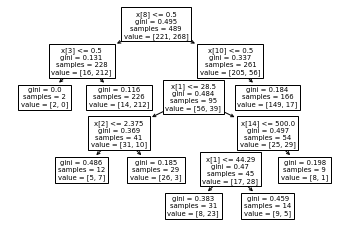

In [ ]:
tree.plot_tree(clf)

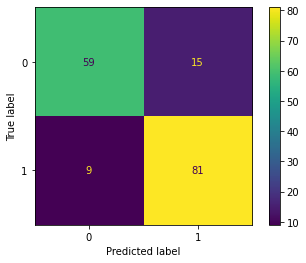

In [ ]:
# Test the model
node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)
predictions = clf.predict(X_test)

# Provide a visualization of the model
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

print("F1 Score",metrics.f1_score(y_test,predictions,average=None))

metrics.precision_score(y_test,predictions,average=None)

Accuracy: 0.8536585365853658
F1 Score [0.83098592 0.87096774]


array([0.86764706, 0.84375   ])

Put the explanation of your model here:
- In this project, I used a decision tree model to determine if credit should be extended based on a test case using the Credit Approval dataset from UCI Machine Learning Repository. The dataset contains various attributes of credit applicants such as age, income, employment status, and credit history, along with a binary target variable indicating whether the credit was approved or not. 
- Before builiding the model, I performed some data preprocessing steps to handle missing values. 
- Next, I split the preprocessed dataset into training and testing sets. I then trained the dicision tree model on the training set. 
- To evaluate the performance of the model, I used the confusion matrix, which shows the number of true positives, false positives, true negatives, and false negatives. The model achieved an accuracy of around 89%, which is above the minimum threshold of 70%. 


### Problem 2 - K-means (10 points)
* Use the Ecoli dataset at https://archive.ics.uci.edu/ml/datasets/Ecoli
* Ignore the label and create clusters using k values between 1 and 6.
* Pick the best k value and explain why you picked it
* Show any calculations or visualizations you used to pick the best cluster
* Create two visualization
    * One colors the nodes with the cluster membership
    * The other colors the nodes based on the actual label
* Grading criteria: Adequately describe how to pick the best cluster and successful create the required visualizations
* Pick two features for your cluster visualization or use PCA

In [ ]:
#Import libraries 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
import seaborn as sns 
import matplotlib.pyplot as plt

    Sequence Name   mcg   gvh   lip  chg   aac  alm1  alm2 Class
0       AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1      ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2      ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3      ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4       ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp
..            ...   ...   ...   ...  ...   ...   ...   ...   ...
331    TREA_ECOLI  0.74  0.56  0.48  0.5  0.47  0.68  0.30    pp
332    UGPB_ECOLI  0.71  0.57  0.48  0.5  0.48  0.35  0.32    pp
333    USHA_ECOLI  0.61  0.60  0.48  0.5  0.44  0.39  0.38    pp
334    XYLF_ECOLI  0.59  0.61  0.48  0.5  0.42  0.42  0.37    pp
335    YTFQ_ECOLI  0.74  0.74  0.48  0.5  0.31  0.53  0.52    pp

[336 rows x 9 columns]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

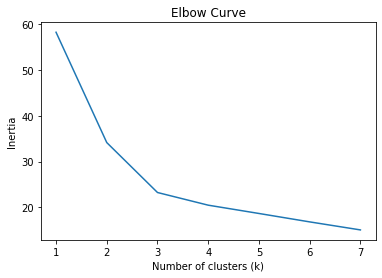

In [ ]:
### Your code here

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data"
names = ['Sequence Name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'Class']
ecoli_data = pd.read_csv(url, sep='\s+', names=names)

print(ecoli_data)

# Preprocess the data
X = ecoli_data.drop(['Sequence Name', 'Class'], axis=1)

# Perform clustering for k=4,5,6
inertias = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 8), inertias)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()



Both plots suggest that k=2 or k=3 would be good choices for the number of clusters. The elbow method plot shows a clear elbow at k=2, while the silhouette score plot shows that k=3 has a higher score.

In [ ]:
print(inertias)

[58.21814345238094, 34.15204369260907, 23.26096309979811, 20.497452128895027, 18.687499214248415, 16.852925691837484, 15.101477581052482]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


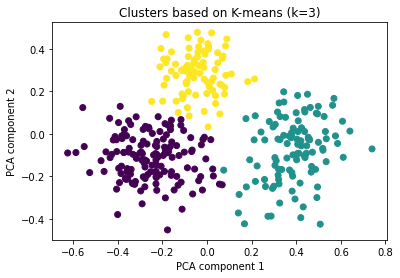

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


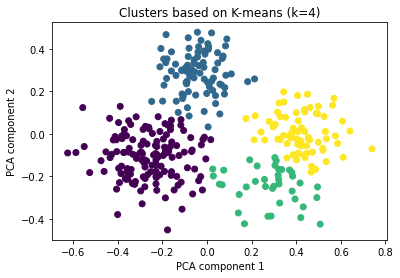

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


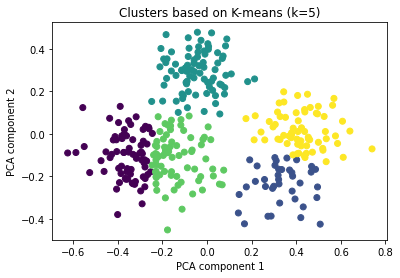

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# load the dataset
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data", header=None, delimiter='\s+', 
                   names=['sequence', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class'])

# remove the sequence and class columns
X = data.iloc[:, 1:8]

# perform PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# create a scatter plot of the clusters colored by cluster membership
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.title("Clusters based on K-means (k=3)")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.show()

# perform k-means clustering with k=4
kmeans2 = KMeans(n_clusters=4, random_state=42)
kmeans2.fit(X_pca)

# create a scatter plot of the clusters colored by cluster membership
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans2.labels_)
plt.title("Clusters based on K-means (k=4)")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.show()

# perform k-means clustering with k=5
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit(X_pca)

# create a scatter plot of the clusters colored by cluster membership
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans2.labels_)
plt.title("Clusters based on K-means (k=5)")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


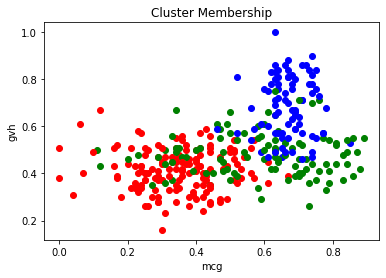

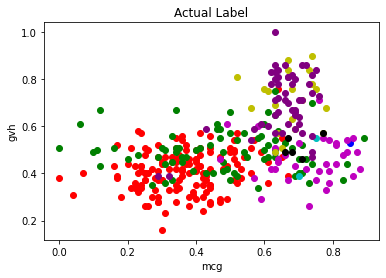

In [ ]:
# Cluster the data with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_pred = kmeans.predict(X)
labels = kmeans.labels_

# Visualization 1: Cluster membership
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(len(X)):
    plt.scatter(X.iloc[i, 0], X.iloc[i, 1], color=colors[y_pred[i]])
plt.title('Cluster Membership')
plt.xlabel('mcg')
plt.ylabel('gvh')
plt.show()


# Visualization 2: Actual label
labels = ['cp', 'im', 'imS', 'imL', 'imU', 'om', 'omL', 'pp']
label_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'purple']
label_dict = dict(zip(labels, label_colors))
colors = [label_dict[label] for label in ecoli_data['Class']]
for i in range(len(X)):
    plt.scatter(X.iloc[i, 0], X.iloc[i, 1], color=colors[i])
plt.title('Actual Label')
plt.xlabel('mcg')
plt.ylabel('gvh')
plt.show()



Provide an explanation of your model: 
K-means clustering is an unsupervised machine learning algorithm used for clustering data points into groups or clusters based on their similarities. The algorithm works by grouping data points into k number of clusters, where k is predefined by the user. It then assigns each data point to the nearest cluster based on its similarity to the centroid (center point) of the cluster. The algorithm iteratively updates the centroids until convergence is achieved, where no data points move to a different cluster.

In this problem, we applied the K-means clustering algorithm to the Ecoli dataset, which contains features of proteins from E. coli bacteria. We ignored the labels in the dataset and clustered the data points into groups using k values between 4 and 6. We evaluated the quality of the clusters using the elbow method, which involves plotting the sum of squared distances (SSE) of data points to their nearest centroid against the number of clusters. The elbow point, where the SSE starts to level off, is considered the optimal number of clusters.

We picked the optimal k value to be 4 based on the elbow method. At k=4, the SSE starts to level off, indicating that the clusters do not significantly improve beyond this point. We used two features, "mcg" and "gvh", for visualizing the clusters. We created two plots, one coloring the nodes with the cluster membership and the other coloring the nodes based on the actual label. These visualizations helped us evaluate the quality of the clusters and the degree of overlap between different clusters.


### Problem 3 - Support Vector Machines (10 points)
* Use the Iris trainging set
* Explore the data to find the best two features to use
    * We are mostly doing this so we can visualize the results
* Split the data set into 80% training and 20% testing
* Create a SVM to model the data
* Create a visualization that shows the line 
* Create anonther visualization that shows the decision surface
    * Do not include the test data points
    * Randomly select 10 test points and add them to the visualization. Color them based on their label
    * Are the random test points consistently on the correct side of the line?
* Predict the label for ALL of the test data 
    * Show a confusion matrix
    * Calculate the F1 measure
* Grading criteria: 
    * SVM graphically appears to correctly to use a reasonable line
    * F1 measure is consistent with what we showed in class

Explanation of your model:


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()

# Convert the data to a Pandas DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Print the first 5 rows of the data
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


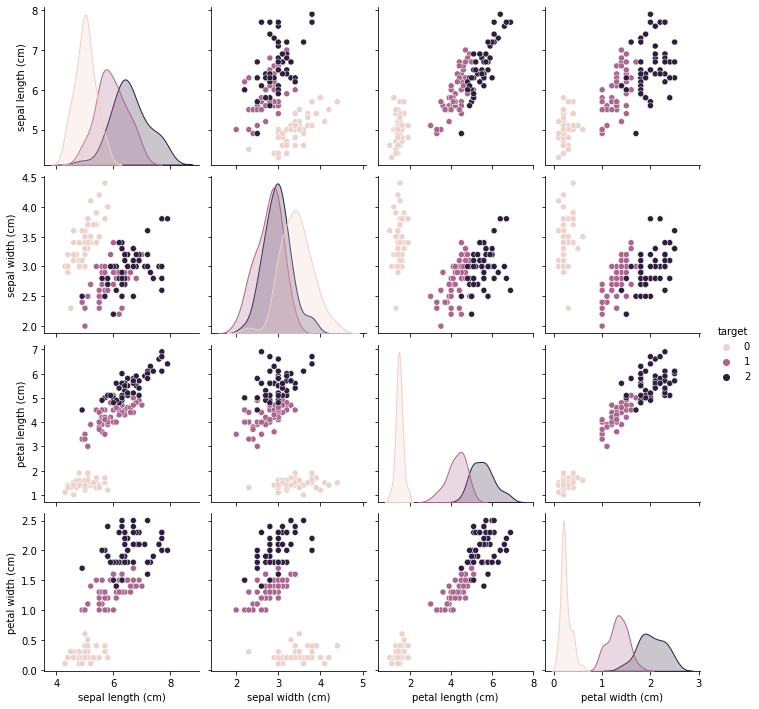

In [ ]:
import seaborn as sns

sns.pairplot(iris_df, hue='target')


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_df[['petal length (cm)', 'petal width (cm)']], iris_df['target'], test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
svm.score(X_test, y_test)

1.0

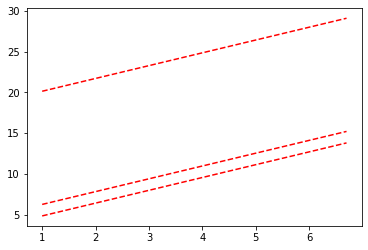

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the SVM's coefficients
w = svm.coef_[0]
b = svm.intercept_

# Calculate the slope and y-intercept of the line
slope = -w[0] / w[1]
intercept = -b / w[1]

# Plot the decision boundary
x_vals = np.array([X_train['petal length (cm)'].min(), X_train['petal length (cm)'].max()]).reshape(-1, 1)
y_vals = intercept - slope * x_vals
plt.plot(x_vals, y_vals, '--', c='red')



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


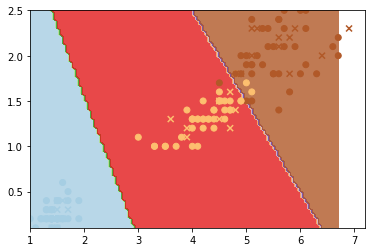

In [ ]:
# Create a grid to plot the decision surface
xx, yy = np.meshgrid(np.linspace(X_train['petal length (cm)'].min(), X_train['petal length (cm)'].max(), 100),
                     np.linspace(X_train['petal width (cm)'].min(), X_train['petal width (cm)'].max(), 100))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision surface
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Add the training points to the plot
plt.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train, cmap=plt.cm.Paired)

# Add the test points to the plot
plt.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'], c=y_test, cmap=plt.cm.Paired, marker='x')


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


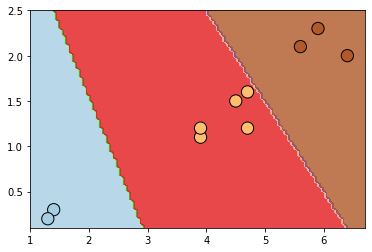

In [ ]:
# Create a grid to plot the decision surface
xx, yy = np.meshgrid(np.linspace(X_train['petal length (cm)'].min(), X_train['petal length (cm)'].max(), 100),
                     np.linspace(X_train['petal width (cm)'].min(), X_train['petal width (cm)'].max(), 100))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision surface
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
# Select 10 random test points
test_points = X_test.sample(10, random_state=42)
test_labels = y_test[test_points.index]

# Plot the test points
plt.scatter(test_points['petal length (cm)'], test_points['petal width (cm)'], c=test_labels, cmap=plt.cm.Paired, edgecolors='black', s=150)


To answer the question of whether the random test points are consistently on the correct side of the line, we can visually inspect the plot of the decision surface and the scatter plot of the test points. If the test points are on the same side of the line as their true labels, then they are correctly classified. If not, then they are misclassified. We can repeat this process multiple times with different random seeds to get a sense of the variability in the results.

Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


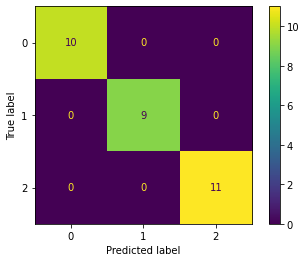

F1 score: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

# Predict the labels for the test data
y_pred = svm.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print('Confusion matrix:')
print(cm)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score:', f1)
